# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_03I/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,ixterm-00001-00006,"['--disable-ansi-color', '--disable-16-color',...",10.7546,0.0000,0.0008,3015768
1,ixterm-00001-00015,"['--disable-active-icon', '--disable-16-color'...",11.8828,0.0000,0.0008,3057856
2,ixterm-00001-00012,"['--disable-active-icon', '--disable-ansi-colo...",9.7843,0.0000,0.0009,2883584
3,ixterm-00001-00014,"['--disable-ansi-color', '--disable-256-color'...",9.5852,0.0000,0.0009,2743048
4,ixterm-00001-00005,"['--disable-16-color', '--disable-256-color', ...",12.7449,0.0000,0.0008,3456200
...,...,...,...,...,...,...
375,ixterm-00020-00016,"['--disable-ansi-color', '--disable-direct-col...",9.8449,0.0008,0.0000,2862200
376,ixterm-00020-00013,"['--disable-active-icon', '--disable-16-color'...",10.2035,0.0009,0.0000,3015848
377,ixterm-00020-00018,"['--disable-active-icon', '--disable-16-color'...",8.7303,0.0000,0.0009,2739752
378,ixterm-00020-00003,"['--disable-ansi-color', '--disable-direct-col...",11.6973,0.0005,0.0004,3202648


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")
df = df_setindex[['Br1', 'Branch', 'Build Time', 'Binary Size']]

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Br1,Branch,Build Time,Binary Size
Br2,,,,
00001,00012,ixterm-00012-00001,9.3336,2736120
00001,00004,ixterm-00004-00001,9.0736,2736120
00001,00002,ixterm-00002-00001,9.1163,2736120
00001,00005,ixterm-00005-00001,9.1301,2736120
00001,00006,ixterm-00006-00001,9.1524,2736120
...,...,...,...,...
00020,00005,ixterm-00005-00020,11.7104,3034008
00020,00003,ixterm-00003-00020,11.9642,3034008
00020,00019,ixterm-00019-00020,11.7754,3034008


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt2.unstack()

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN   9.1163   9.0891   9.0736   9.1301   9.1524   9.1501   
00002     8.7368      NaN   8.6873   8.6291   8.7686   8.6652   8.6650   
00003    12.5123  12.3458      NaN  12.3965  12.3108  12.2616  12.5260   
00004    12.1019  11.8820  12.0748      NaN  12.0551  11.9523  12.2680   
00005    12.7449  12.5508  12.6136  12.7821      NaN  12.5293  12.8325   
00006    10.7546  10.6838  10.6532  10.6133  10.6008      NaN  10.6410   
00007    10.4622  10.2674  10.3956  10.3551  10.3344  10.3504      NaN   
00008    10.7503  10.5149  10.5778  10.5351  10.7648  10.5467  10.6142   
00009    12.3140  12.3104  12.5543  12.4579  12.6320  12.5762  12.5001   
00010    11.4290  11.5527  11.5452  11.4529  11.4639  11.5387  11.5405   
00011    10.4193  10.4026  10.4646  10.5490  10.3758  10.3698  10.4709   
00012     9.7843   9.5531   9.7149   9.7836   9.6092   9.7017   9.5802   
00013    10.8334  10.9304  10.8081  10.7115  10.9502  10.8141  10.7626   
00014     9.5852   9.3859   9.4474   9.2596   9.4684   9.3767   9.5045   
00015    11.8828  10.9475  11.0279  10.9104  11.1997  10.9482  11.0960   
00016    10.4549  10.4942  10.5124  10.4016  10.3985  10.4143  10.5782   
00017     8.1977   8.1524   8.1492   8.0991   8.2315   8.1534   8.1398   
00018     9.1460   9.2290   9.1547   9.3132   9.2171   9.1158   9.2947   
00019    12.5807  12.4981  12.7342  12.7501  12.7693  12.6570  12.5183   
00020    11.7624  11.7752  11.9642  11.8461  11.7104  11.8185  11.6418   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001   9.0484   9.1542   9.1805   9.1184   9.3336   9.7711   8.9454   9.0554   
00002   8.6641   8.6652   8.6462   8.6350   8.6785   8.6874   8.6230   8.3685   
00003  12.4039  12.3280  12.2960  12.4972  12.7923  12.5609  12.3129  11.8942   
00004  12.0848  12.0852  12.0920  12.2909  11.5639  12.4557  12.7778  11.9252   
00005  12.9163  12.8841  12.9797  12.7899  12.7535  13.2582  12.8668  12.4578   
00006  10.5674  10.7118  10.5872  10.6453  10.6516  10.6716  10.7365  10.4730   
00007  10.5285  10.4619  10.3277  10.4305   9.8654  10.7261  11.4248  10.3535   
00008      NaN  10.6651  10.7623  10.6538  10.1026  10.8857  10.6444  10.5227   
00009  12.6403      NaN  12.3284  12.3148  13.2369  12.8100  12.1444  12.1364   
00010  11.5180  11.4461      NaN  11.5753  10.8516  12.2496  11.7243  11.4124   
00011  10.4160  10.4449  10.4328      NaN  10.4087  11.6846  10.1481  10.5302   
00012   9.6616   9.7742   9.6509   9.5259      NaN  10.0763   9.6734   9.5669   
00013  10.8235  11.0133  10.9506  10.8659  10.9998      NaN  10.6812  10.4089   
00014   9.4567   9.5380   9.4891   9.5759   9.4339   9.6597      NaN   9.2906   
00015  10.9190  11.1266  11.0835  11.1034  11.1746  10.9661  10.9922      NaN   
00016  10.4370  10.4771  10.5411  10.5149  10.5798  11.6486  10.3887  10.3588   
00017   8.0671   8.2659   8.1231   8.2216   7.6768   9.0727   8.2497   8.0290   
00018   9.2308   9.2971   9.2552   9.2345   9.3642  10.3036   9.0606   8.8183   
00019  12.5637  12.6577  12.6027  12.6583  13.3941  13.3160  12.4466  12.5077   
00020  11.5920  11.5978  11.6464  11.5471  12.5681  12.4307  11.9981  11.5161   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001   8.9257   9.0851   9.0985   9.2069   8.6371  
00002   8.6863   8.5004   9.0608   9.3291   8.2148  
00003  12.1475  13.1523  13.2084  12.7207  11.6973  
00004  12.5566  11.6006  11.6290  11.7340  12.8007  
00005  12.2499  12.3533  12.1916  13.0314  13.4674  
00006  10.2233 

In [5]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0   
00002   2468160.0        NaN  2468160.0  2468160.0  2468160.0  2468160.0   
00003   3202648.0  3202648.0        NaN  3202648.0  3202648.0  3202648.0   
00004   3344192.0  3344192.0  3344192.0        NaN  3344192.0  3344192.0   
00005   3456200.0  3456200.0  3456200.0  3456200.0        NaN  3456200.0   
00006   3015768.0  3015768.0  3015768.0  3015768.0  3015768.0        NaN   
00007   2857160.0  2857160.0  2857160.0  2857160.0  2857160.0  2857160.0   
00008   2902288.0  2902288.0  2902288.0  2902288.0  2902288.0  2902288.0   
00009   3218472.0  3218472.0  3218472.0  3218472.0  3218472.0  3218472.0   
00010   3023648.0  3023648.0  3023648.0  3023648.0  3023648.0  3023648.0   
00011   2904408.0  2904408.0  2904408.0  2904408.0  2904408.0  2904408.0   
00012   2883584.0  2883584.0  2883584.0  2883584.0  2883584.0  2883584.0   
00013   3015848.0  3015848.0  3015848.0  3015848.0  3015848.0  3015848.0   
00014   2743048.0  2743048.0  2743048.0  2743048.0  2743048.0  2743048.0   
00015   3057856.0  3057856.0  3057856.0  3057856.0  3057856.0  3057856.0   
00016   2862200.0  2862200.0  2862200.0  2862200.0  2862200.0  2862200.0   
00017   2393760.0  2393760.0  2393760.0  2393760.0  2393760.0  2393760.0   
00018   2739752.0  2739752.0  2739752.0  2739752.0  2739752.0  2739752.0   
00019   3295512.0  3295512.0  3295512.0  3295512.0  3295512.0  3295512.0   
00020   3034008.0  3034008.0  3034008.0  3034008.0  3034008.0  3034008.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0   
00002  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0   
00003  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0   
00004  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0   
00005  3456200.0  3456200.0  3456200.0  3456200.0  3456200.0  3456200.0   
00006  3015768.0  3015768.0  3015768.0  3015768.0  3015768.0  3015768.0   
00007        NaN  2857160.0  2857160.0  2857160.0  2857160.0  2857160.0   
00008  2902288.0        NaN  2902288.0  2902288.0  2902288.0  2902288.0   
00009  3218472.0  3218472.0        NaN  3218472.0  3218472.0  3218472.0   
00010  3023648.0  3023648.0  3023648.0        NaN  3023648.0  3023648.0   
00011  2904408.0  2904408.0  2904408.0  2904408.0        NaN  2904408.0   
00012  2883584.0  2883584.0  2883584.0  2883584.0  2883584.0        NaN   
00013  3015848.0  3015848.0  3015848.0  3015848.0  3015848.0  3015848.0   
00014  2743048.0  2743048.0  2743048.0  2743048.0  2743048.0  2743048.0   
00015  3057856.0  3057856.0  3057856.0  3057856.0  3057856.0  3057856.0   
00016  2862200.0  2862200.0  2862200.0  2862200.0  2862200.0  2862200.0   
00017  2393760.0  2393760.0  2393760.0  2393760.0  2393760.0  2393760.0   
00018  2739752.0  2739752.0  2739752.0  2739752.0  2739752.0  2739752.0   
00019  3295512.0  3295512.0  3295512.0  3295512.0  3295512.0  3295512.0   
00020  3034008.0  3034008.0  3034008.0  3034008.0  3034008.0  3034008.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0  2736120.0   
00002  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0  2468160.0   
00003  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0  3202648.0   
00004  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0  3344192.0   
00005 

In [6]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = "Br2", 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=["max", "mean", "min"],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,9.7711,9.119574,8.6371
00002,9.3291,8.679542,8.2148
00003,13.2084,12.440242,11.6973
00004,12.8007,12.101605,11.5639
00005,13.4674,12.750163,12.1916
00006,11.8941,10.709089,10.2233
00007,11.5576,10.426716,9.7535
00008,11.2287,10.553916,9.9053


In [7]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00005,13.4674,12.750163,12.1916
00019,13.3941,12.695153,11.8446
00003,13.2084,12.440242,11.6973
00009,13.5336,12.531811,11.5710
00004,12.8007,12.101605,11.5639
00020,12.8917,11.815132,10.9054
00010,13.4418,11.573921,10.8516
00015,12.7770,11.163816,10.4540


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

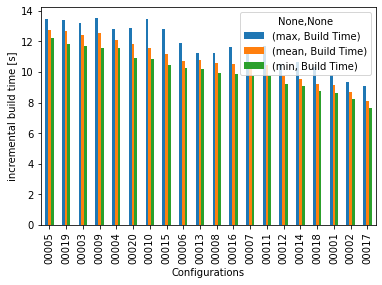

In [8]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

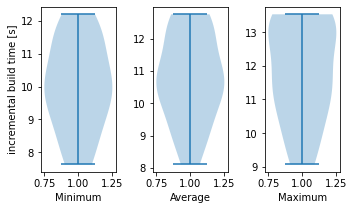

In [9]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()